<a href="https://colab.research.google.com/github/HwangSiyeon/ESAA_homework/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-1. 데이터 시각화가 필요한 이유
### 앤스콤 4분할 그래프 살펴보기 - 앤스콤 데이터 집합 불러온 후 그래프 그리기

In [1]:
# 앤스콤 데이터 집합 불러오기
import seaborn as sns
anscombe=sns.load_dataset("anscombe")
print(anscombe.head(5))
print(type(anscombe))

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# matplotlib 라이브러리 불러오기
%matplotlib notebook
import matplotlib.pyplot as plt

In [ ]:
dataset_1 = anscombe[anscombe["dataset"]=="I"]

<IPython.core.display.Javascript object>


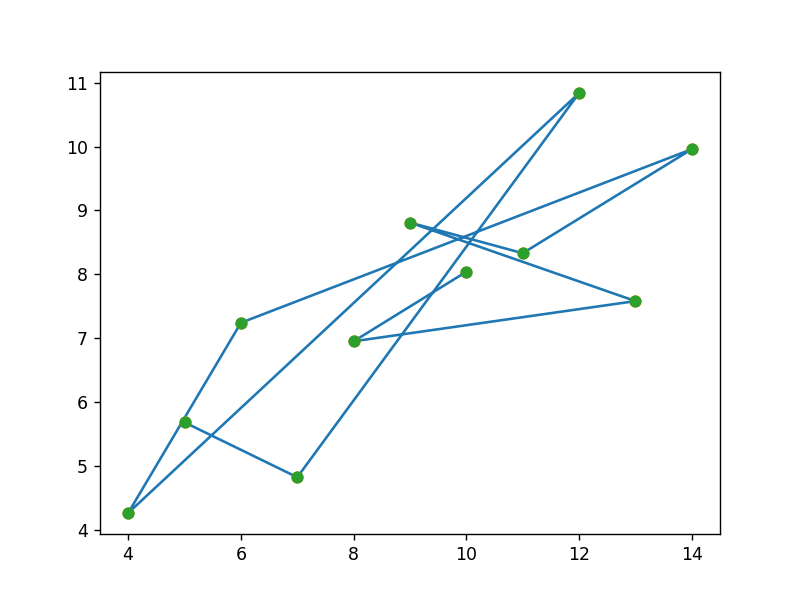

In [ ]:
plt.plot(dataset_1['x'],dataset_1['y'])

In [ ]:
plt.plot(dataset_1['x'],dataset_1['y'],'o')

### 앤스콤 집합 데이터 모두 사용해 그래프 만들기 - 한 번에 4개 그래프 그리기

In [ ]:
dataset_2 = anscombe[anscombe["dataset"]=="II"]
dataset_3 = anscombe[anscombe["dataset"]=="III"]
dataset_4 = anscombe[anscombe["dataset"]=="IV"]

<IPython.core.display.Javascript object>


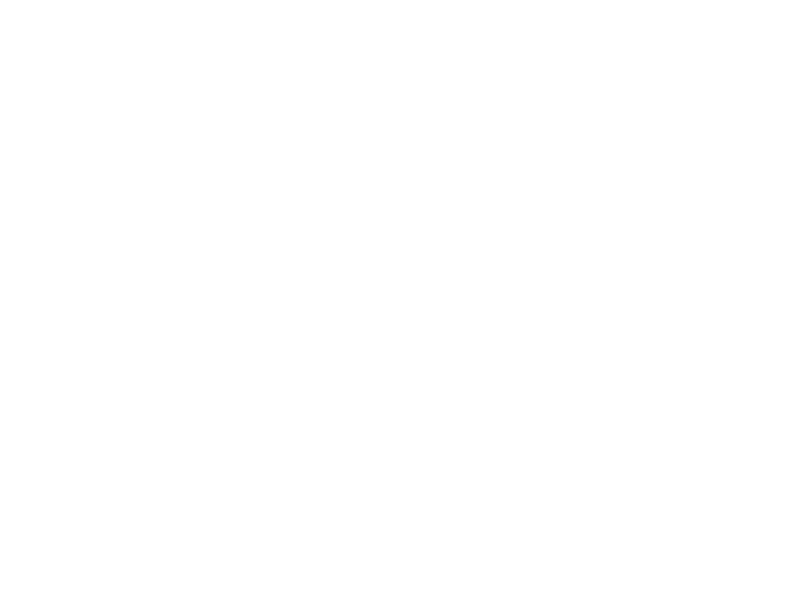

In [ ]:
fig = plt.figure()

In [ ]:
axes1= fig.add_subplot(2,2,1)  # 4개의 그래프 칸 만들기
axes2= fig.add_subplot(2,2,2)
axes3= fig.add_subplot(2,2,3)
axes4= fig.add_subplot(2,2,4)

<IPython.core.display.Javascript object>


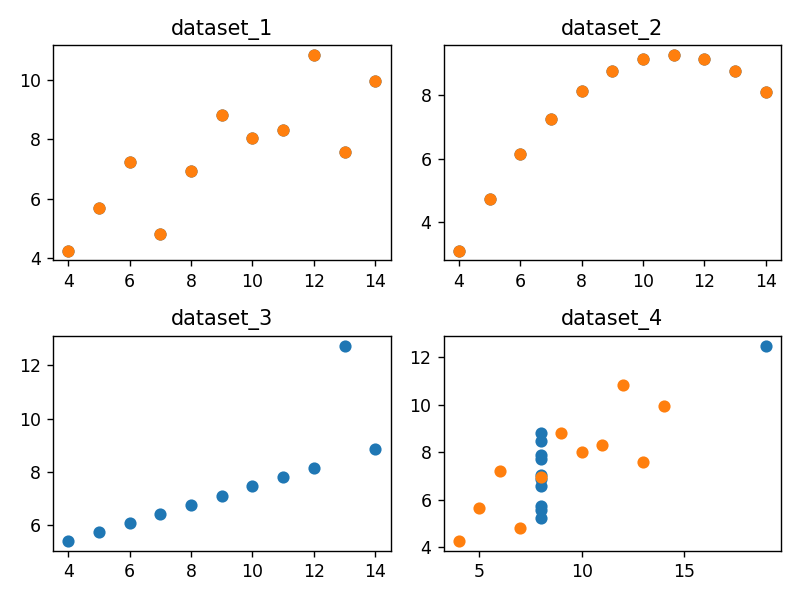

In [ ]:
axes1.plot(dataset_1['x'],dataset_1['y'],'o')
axes2.plot(dataset_2['x'],dataset_2['y'],'o')
axes3.plot(dataset_3['x'],dataset_3['y'],'o')
axes4.plot(dataset_4['x'],dataset_4['y'],'o')
fig ### fig 를 반드시 입력해야 한다!!

In [ ]:
# 각각의 그래프를 쉽게 구분할 수 있도록 그래프 격자에 제목 추가
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

Text(0.5, 1.0, 'dataset_4')

<IPython.core.display.Javascript object>


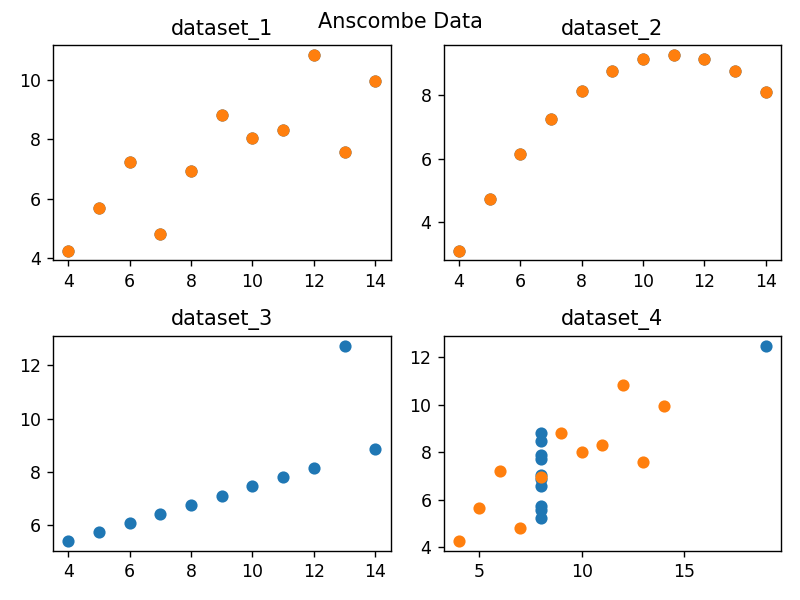

In [ ]:
# (큰 제목)기본 틀에 제목을 추가하려면 suptitle 메서드 사용
fig.suptitle("Anscombe Data")
fig

In [ ]:
# 그래프의 이름과 숫자가 겹쳐 보이므로 tight_layout 메소드를 통해 그래프의 레이아웃 조정
fig.tight_layout() # 자동 조정된다

# 4-2. matplotlib 자유자재로 사용하기
### 기초 그래프 그리기 - 히스토그램, 산점도 그래프, 박스그래프
* 히스토그램: 데이터프레임의 열 데이터 분포와 빈도를 살펴보는 용도로 자주 사용.

In [ ]:
tips =sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>


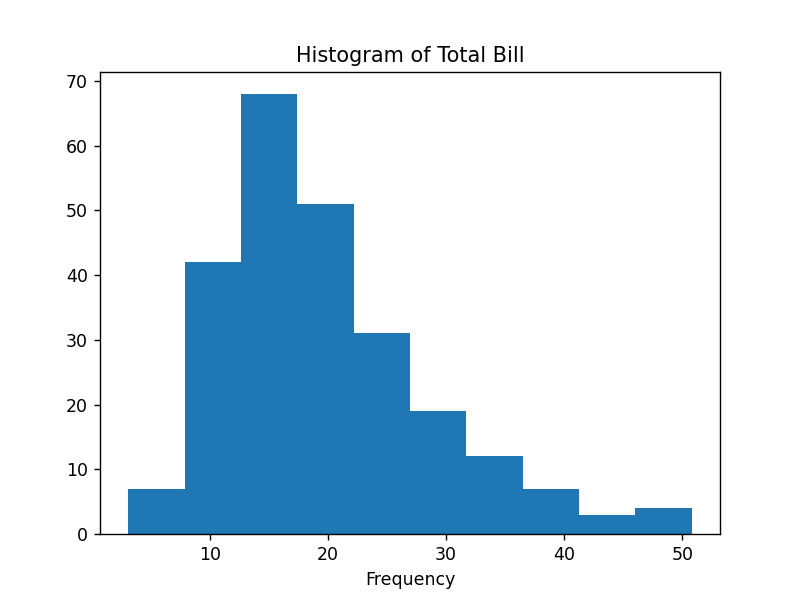

Text(0.5, 302.4305555555555, 'Total Bill')

In [ ]:
# Histogram 그리기
fig = plt.figure() # 기본 틀(fig) 마련
axes1= fig.add_subplot(1,1,1) # 격자(axes1) 구성
axes1.hist(tips['total_bill'],bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes2.set_xlabel('Total Bill')

- 산점도 그래프 : 변수 2개 사용. 이변량 그래프, scatter 메소드에 칼럼 이름 전다

<IPython.core.display.Javascript object>


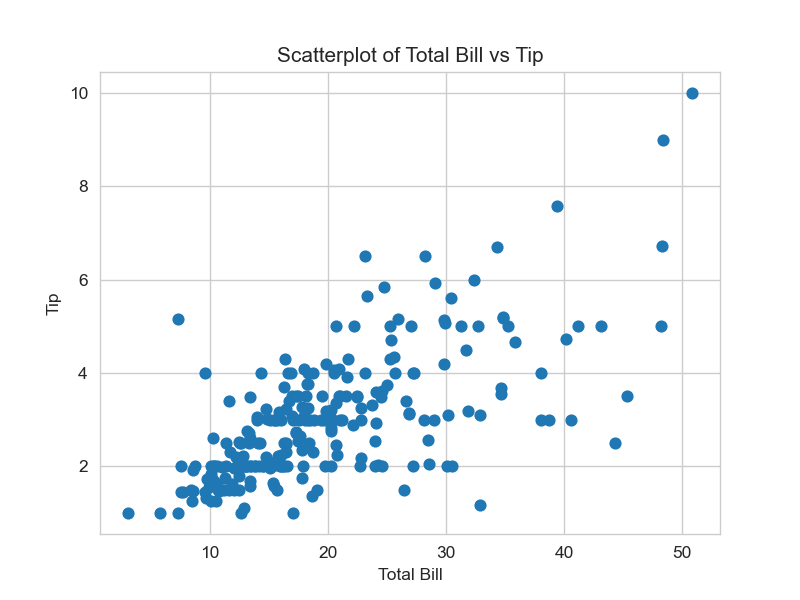

Text(0, 0.5, 'Tip')

In [ ]:
# 산점도 그리기
scatter_plot=plt.figure()
axes1= scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'],tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel("Total Bill")
axes1.set_ylabel("Tip")

- 박스 그래프 : 이산형 변수와 연속형 변수를 함께 사용

<IPython.core.display.Javascript object>


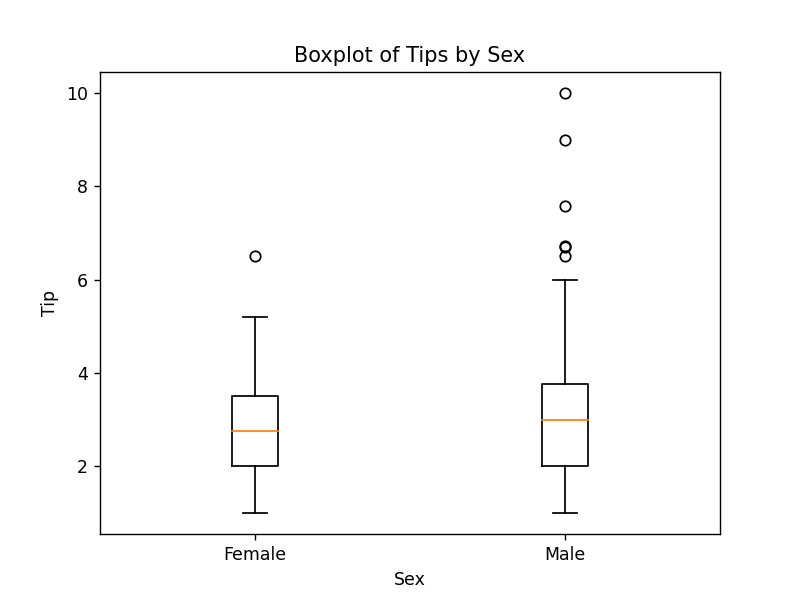

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

In [ ]:
boxplot = plt.figure()
axes1=boxplot.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex']=='Female']['tip'],
             tips[tips['sex']=='Male']['tip']],
             labels = ["Female","Male"])
axes1.set_xlabel("Sex")
axes1.set_ylabel("Tip")
axes1.set_title("Boxplot of Tips by Sex")

### 다변량 그래프 그리기
- 산점도 그래프

In [ ]:
# 앞에 실습한 산점도 그래프에 성별을 새 변수로 추가
def recode_sex(sex):
    if sex == "Female":
        return 0
    else:

        return 1

# recode_sex가 반환하는 값을 데이터 프레임에 추가(.apply 이용)
tips['sex_color']= tips['sex'].apply(recode_sex)

<IPython.core.display.Javascript object>


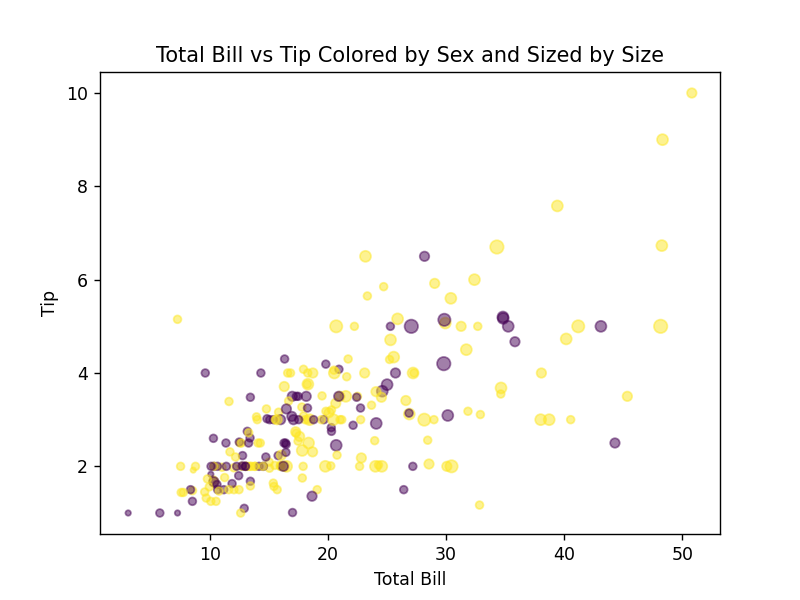

Text(0, 0.5, 'Tip')

In [ ]:
scatter_plot = plt.figure()
axes1= scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips["total_bill"],
    y=tips["tip"],
    s=tips["size"]*10,
    c=tips["sex_color"],
    alpha=0.5)
axes1.set_title("Total Bill vs Tip Colored by Sex and Sized by Size")
axes1.set_xlabel("Total Bill")
axes1.set_ylabel("Tip")

# 4-3. seaborn 라이브러리 자유자재로 사용하기

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram Density Plot')

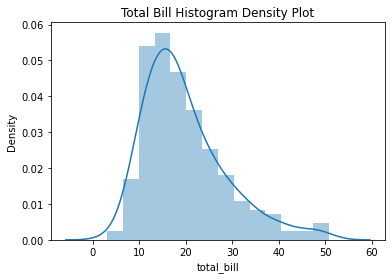

In [ ]:
# 히스토그램 그리기
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])  # Distplot의 디폴트값은 (히스토그램+ Density plot) 이다
ax.set_title('Total Bill Histogram Density Plot')
# 경고 메시지는 메서드의 사용 방법이 바뀌었음을 알려주는 것이다

Text(0, 0.5, 'Frequency')

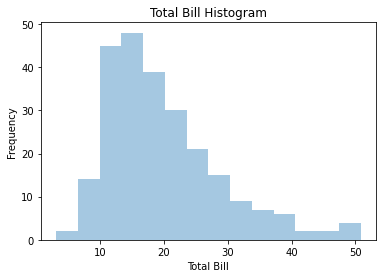

In [ ]:
ax = plt.subplots()
ax=sns.distplot(tips["total_bill"],kde=False) # Density plot을 제외한다
ax.set_title("Total Bill Histogram")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Frequency")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unit Probability')

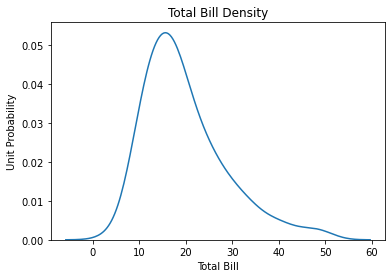

In [ ]:
ax = plt.subplots()
ax=sns.distplot(tips["total_bill"], hist =False)
ax.set_title("Total Bill Density")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Unit Probability")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Bill')

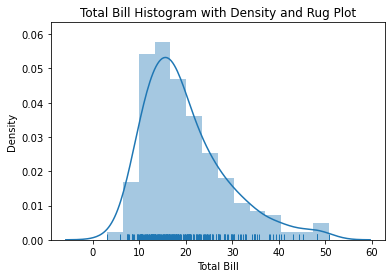

In [ ]:
# Rug Plot 추가
ax = plt.subplots()
ax=sns.distplot(tips["total_bill"],rug=True)
ax.set_title("Total Bill Histogram with Density and Rug Plot")
ax.set_xlabel("Total Bill")

<IPython.core.display.Javascript object>


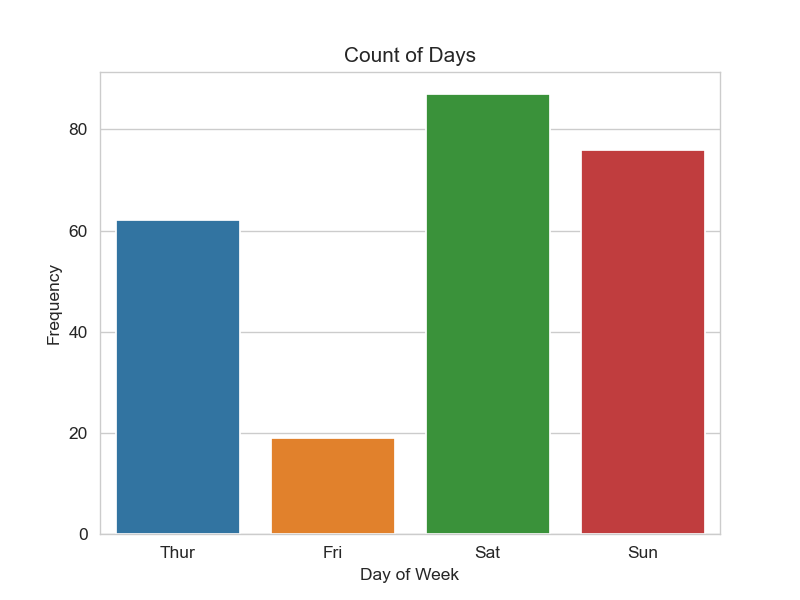

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

In [ ]:
# count 그래프 - 이산값을 나타낸 그래프
ax = plt.subplots()
ax = sns.countplot("day",data=tips) # ""안에는 셀 항목 기입, 그 옆에는 데이터명 기입
ax.set_title("Count of Days")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Frequency")

### 다양한 종류의 이변량 그래프 그리기

<IPython.core.display.Javascript object>


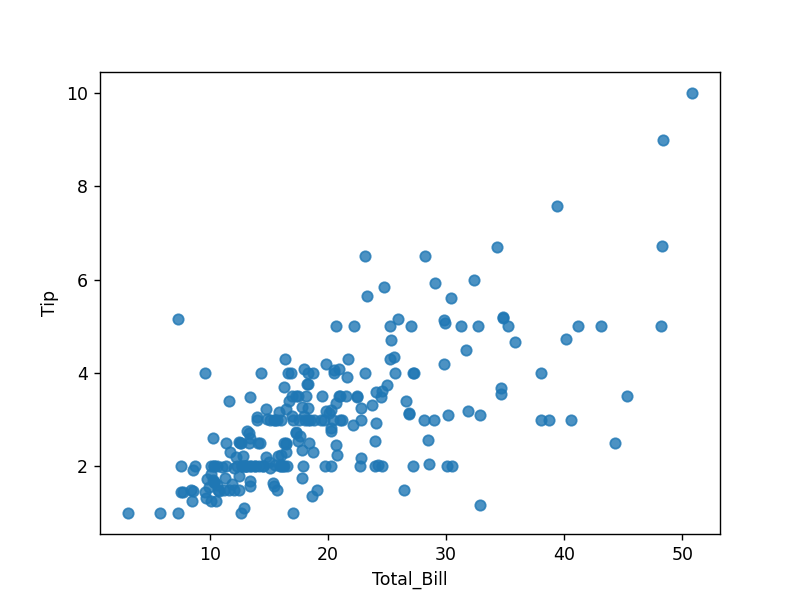

Text(0, 0.5, 'Tip')

In [ ]:
# seaborn 라이브러리로 산점도 그래프 그리기 - 회귀선, 95% 예측 범위도 함께 나온다
ax= plt.subplots()
ax=sns.regplot(x="total_bill",y="tip",data=tips)
ax.set_title("Scatterplot of Bill and Tip")
ax.set_xlabel("Total_Bill")
ax.set_ylabel("Tip")

In [ ]:
# regplot() - seaborn 라이브러리로 산점도 그래프 그리기 - 회귀선, 95% 예측 범위 끄기
ax = plt.subplot()
ax = sns.regplot(x="total_bill",y="tip",data=tips, fit_reg=False)
ax.set_xlabel("Total_Bill")
ax.set_ylabel("Tip")

Text(0, 0.5, 'Tip')

<IPython.core.display.Javascript object>


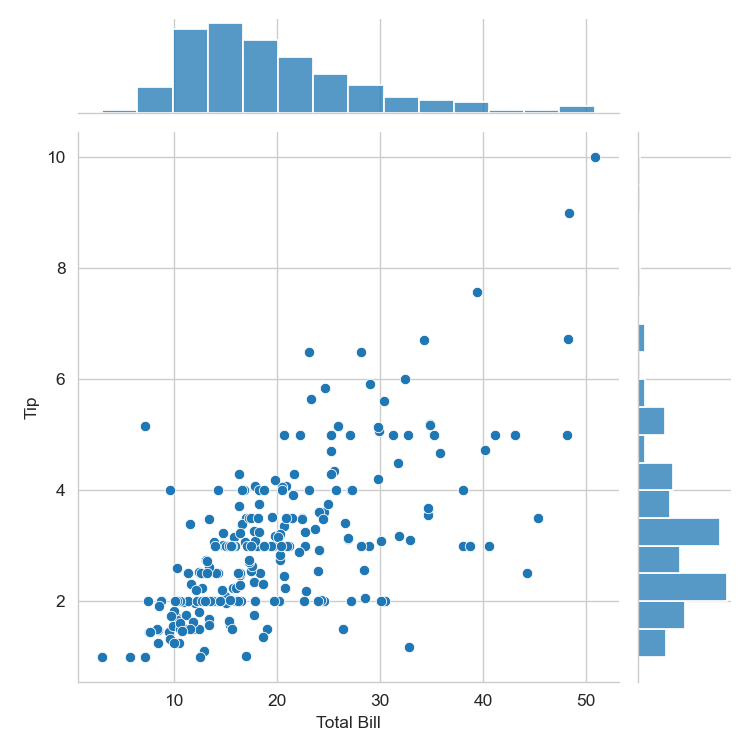

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

In [ ]:
# jointplot() - 산점도 그래프와 히스토그램을 한번에 그려준다

joint= sns.jointplot(x='total_bill',y='tip',data=tips)
joint.set_axis_labels(xlabel="Total Bill",ylabel="Tip")
joint.fig.suptitle("Joint Plot of Total Bill and Tip",fontsize = 10,y=1.03)

<IPython.core.display.Javascript object>


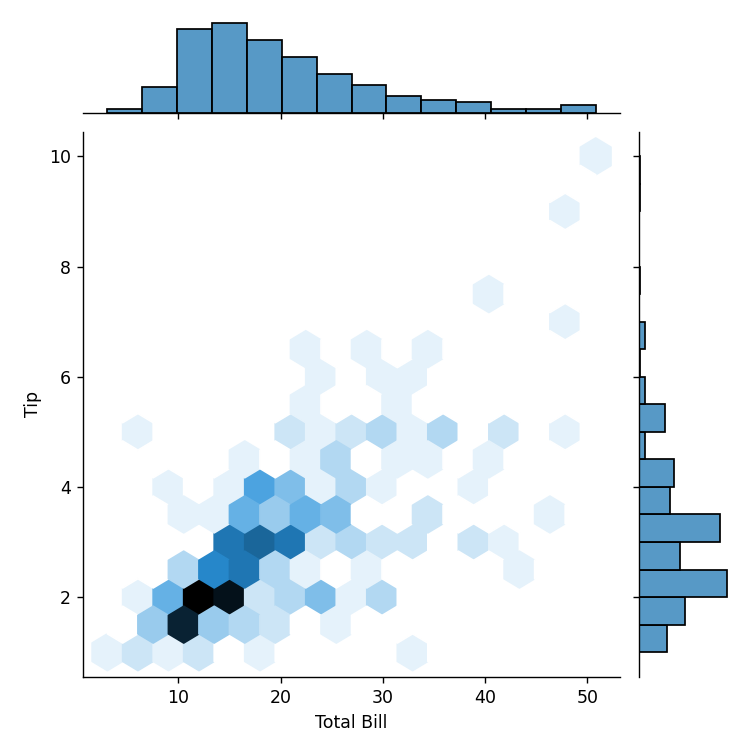

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

In [ ]:
# 육각 그래프(hex graph) - 산점도 그래프의 데이터를 구분하기 쉽게 그릴 수 있다 - kind 인자값을 hex로 지정
hexbin = sns.jointplot(x="total_bill",y="tip",data=tips,kind="hex")
hexbin.set_axis_labels(xlabel="Total Bill",ylabel="Tip")
hexbin.fig.suptitle("Hexbin Joint Plot of Total Bill and Tip",fontsize=10,y=1.03)

<IPython.core.display.Javascript object>


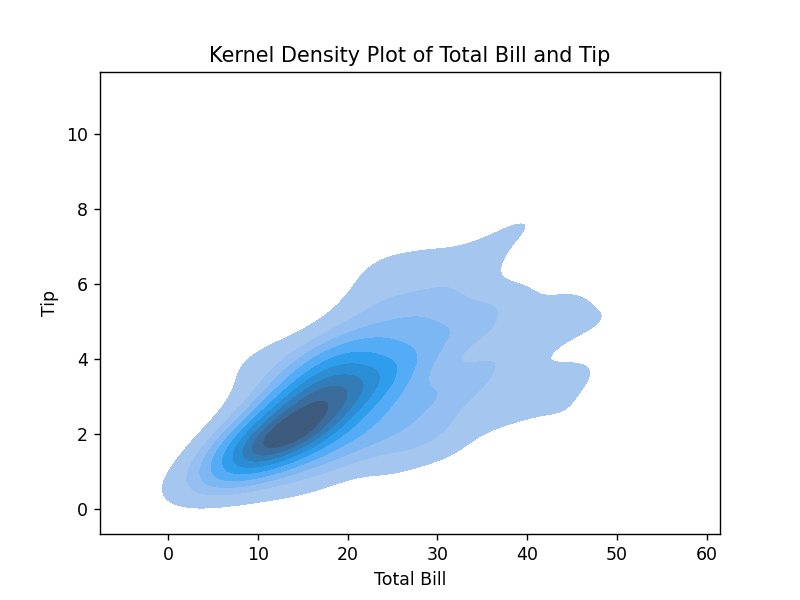

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1639: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

In [ ]:
# kdeplot() - 이차원 밀집도 그리기
ax= plt.subplots()
ax = sns.kdeplot(data = tips["total_bill"],data2=tips["tip"],shade=True)
ax.set_title("Kernel Density Plot of Total Bill and Tip")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

<IPython.core.display.Javascript object>


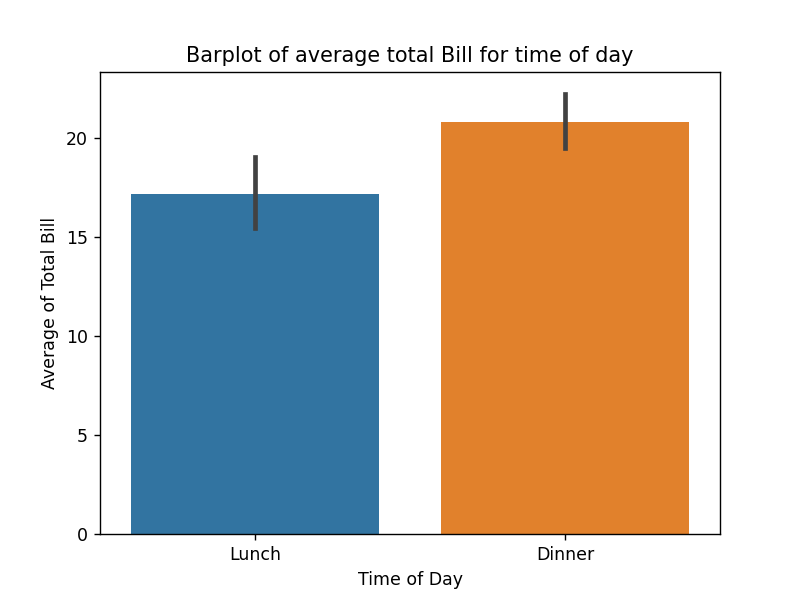

Text(0, 0.5, 'Average of Total Bill')

In [ ]:
# barplot() - 바 그래프 그리기 - 지정한 변수의 평균을 계산하여 그린다(1개 categorical 변수, 1개 numeric 변수)(x,y 바꿔도 괜찮!)
ax = plt.subplots()
ax = sns.barplot(x="time",y="total_bill",data=tips)
ax.set_title("Barplot of average total Bill for time of day")
ax.set_xlabel("Time of Day")
ax.set_ylabel("Average of Total Bill")

<IPython.core.display.Javascript object>


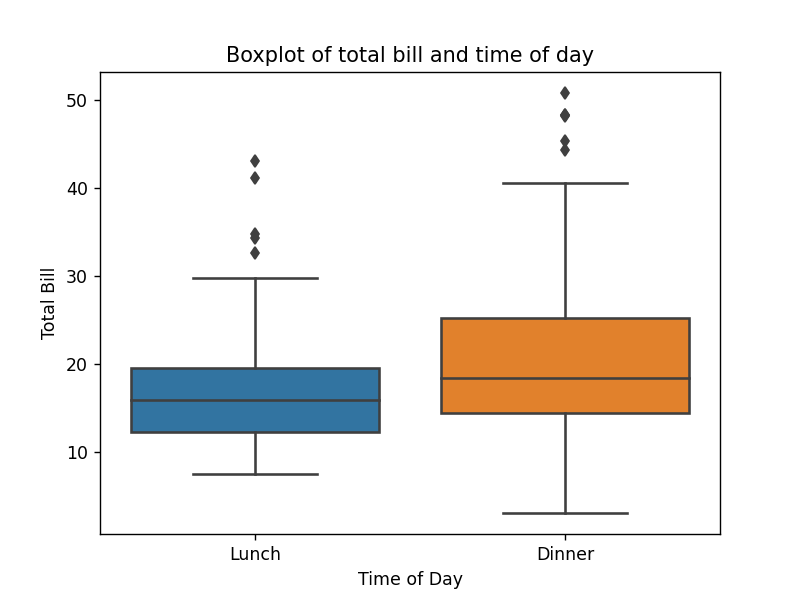

Text(0, 0.5, 'Total Bill')

In [ ]:
# sns.boxplot() - 박스 그래프 - (1개 categorical, 1개 numeric)
ax=plt.subplots()
ax=sns.boxplot(x="time",y="total_bill",data= tips)
ax.set_title("Boxplot of total bill and time of day")
ax.set_xlabel("Time of Day")
ax.set_ylabel("Total Bill")

<IPython.core.display.Javascript object>


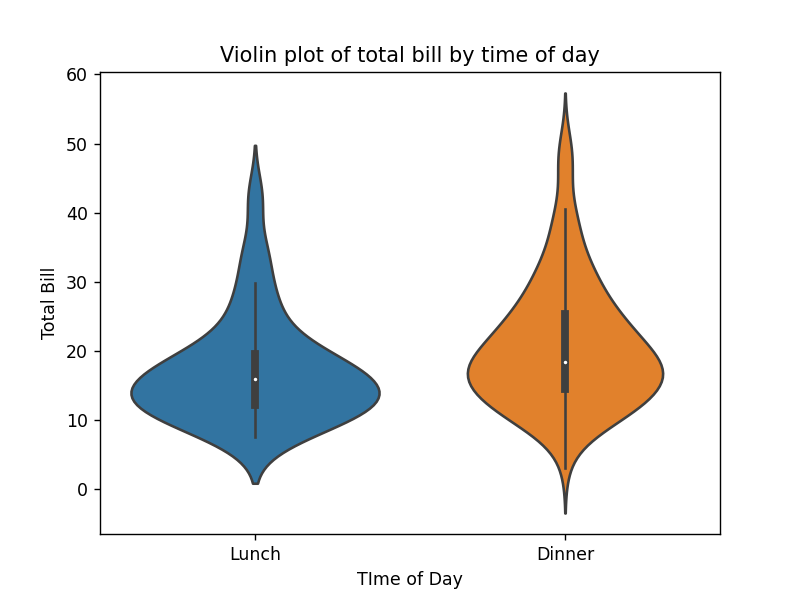

Text(0, 0.5, 'Total Bill')

In [ ]:
# sns.violinplot() - 바이올린 그래프 - 커널 밀도를 추정
ax=plt.subplots()
ax=sns.violinplot(x="time",y="total_bill",data=tips)
ax.set_title("Violin plot of total bill by time of day")
ax.set_xlabel("TIme of Day")
ax.set_ylabel("Total Bill")

<IPython.core.display.Javascript object>


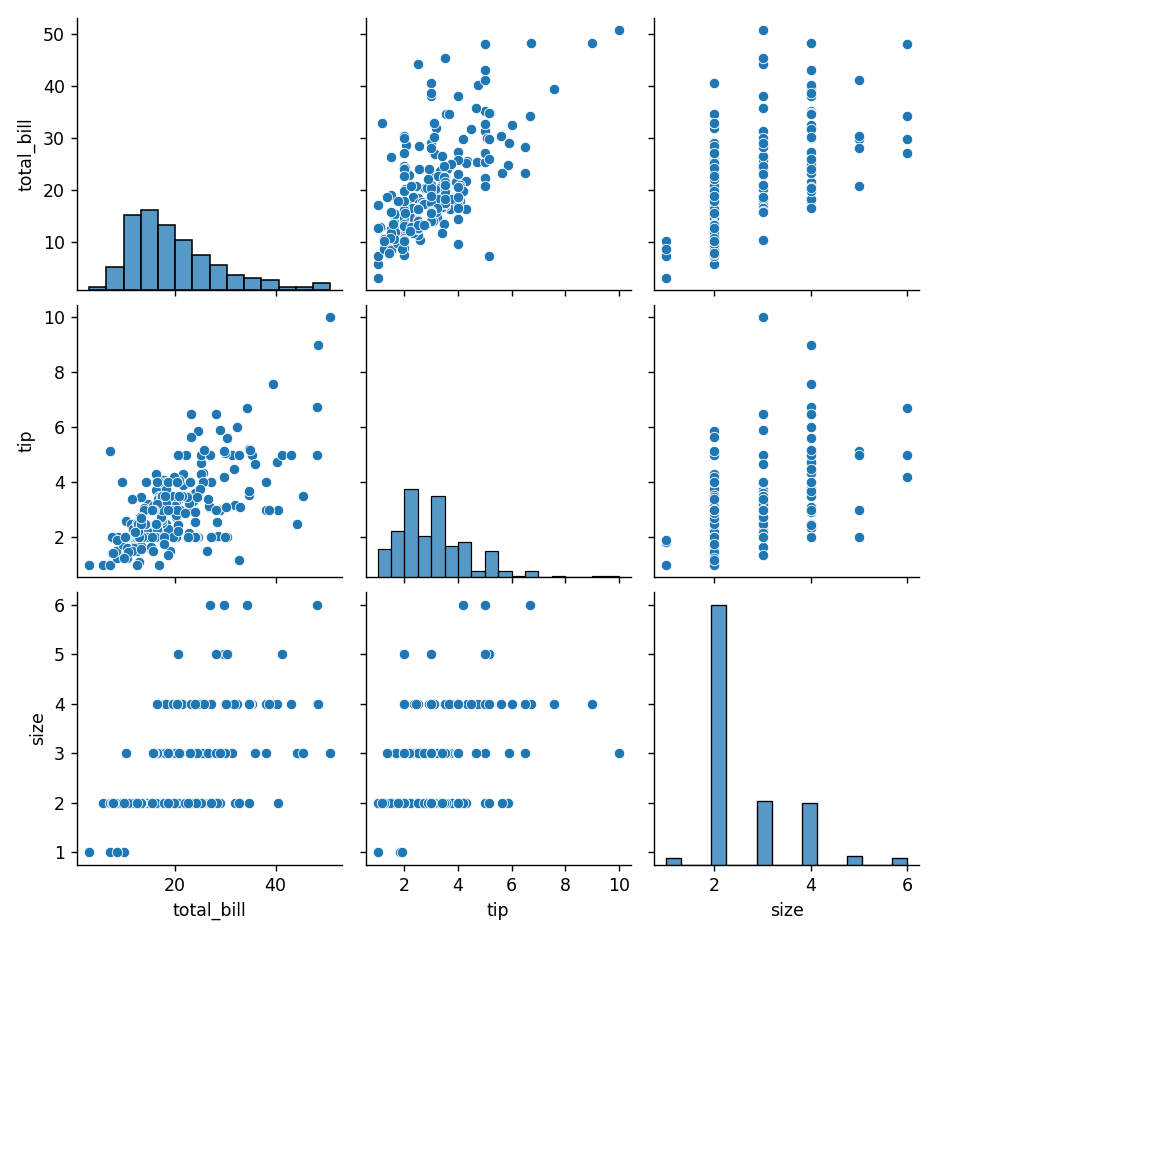

In [ ]:
# pairplot() - 관계 그래프 그리기
fig = sns.pairplot(tips)

<IPython.core.display.Javascript object>


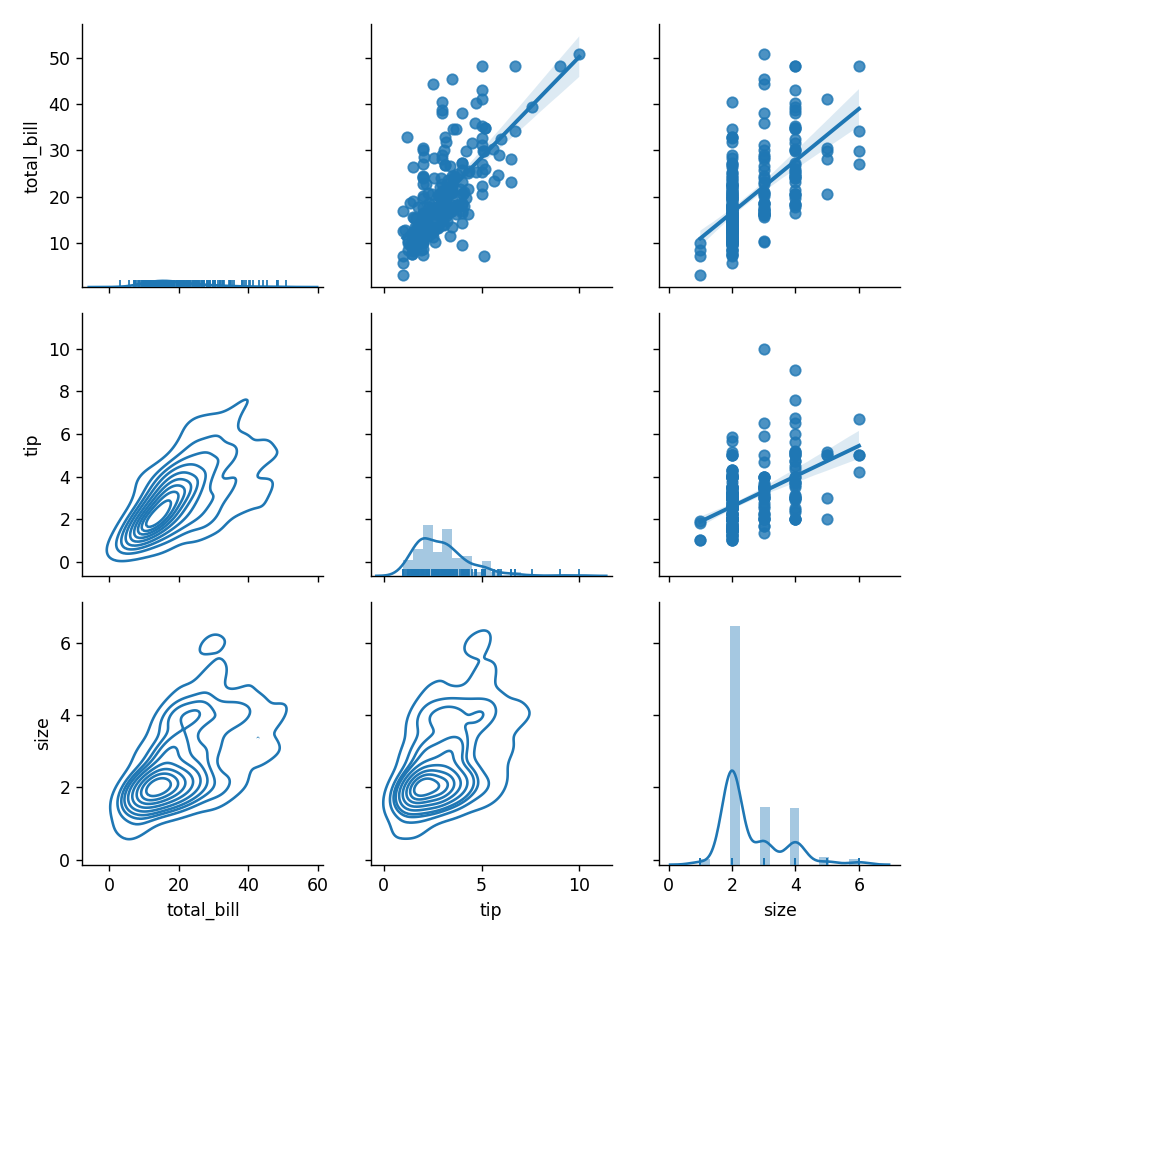

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

In [ ]:
# pariplot()의 중복을 해결하기 위한 map_upper, map_lower 메소드
# map_upper 메소드는 대각선 기준 위쪽에 그릴 그래프를 지정
# map_lower 메소드는 대각선 기준 아래쪽에 그릴 그래프를 지정
# map_diag 메소드는 대각선 기준 아래쪽에 그릴 그래프를 지정

pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot) # 산점도 그래프
pair_grid = pair_grid.map_lower(sns.kdeplot) # 이차원 밀집도
pair_grid = pair_grid.map_diag(sns.distplot,rug=True) # 히스토그램, 밀집도 그래프
plt.show()

<IPython.core.display.Javascript object>


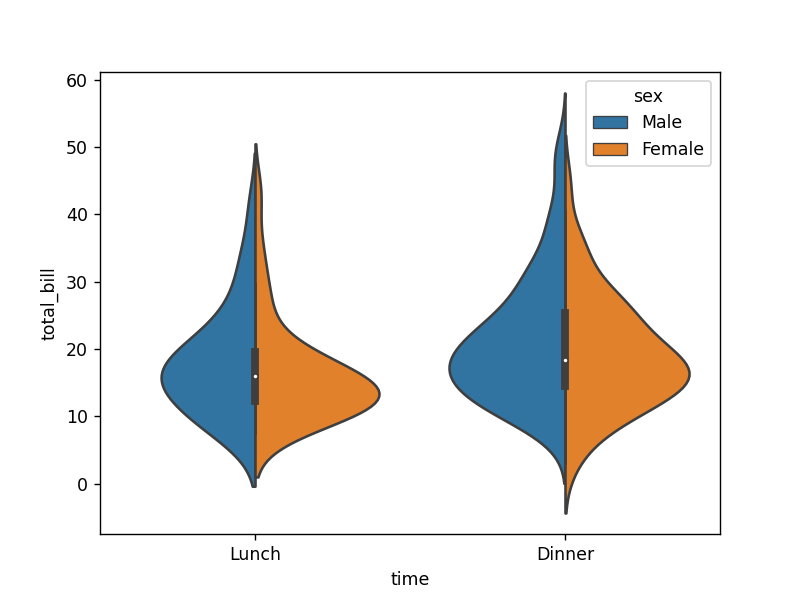

In [ ]:
# 다변량 그래프 그리기

# 바이올린 그래프에 색상 추가 - hue 인자값
# 여러 개로 안 자르고 쪼개진 모양으로 만들기 - split True
ax = plt.subplots()
ax = sns.violinplot(x="time",y="total_bill",data=tips,hue="sex", split=True)

<IPython.core.display.Javascript object>


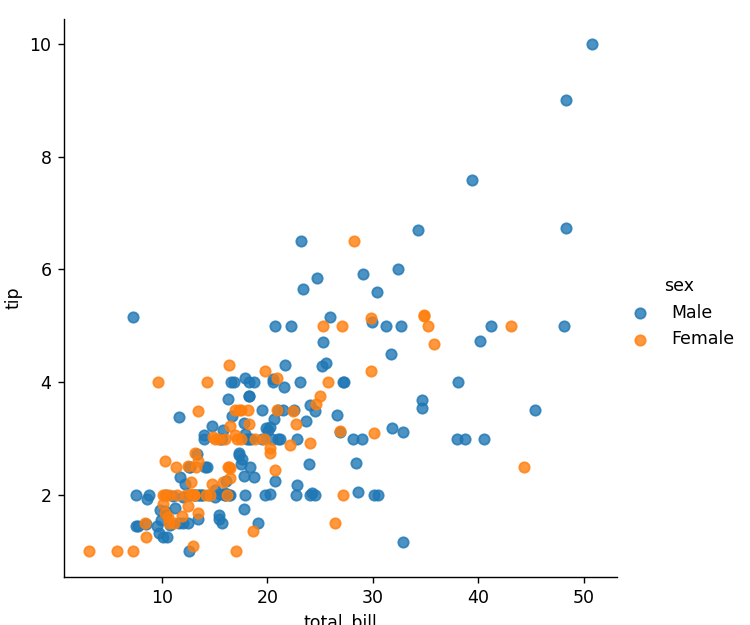

In [ ]:
# 산점도 그래프에 색상 추가 - hue 인자값
scatter = sns.lmplot(x="total_bill",y="tip",data=tips,hue="sex",fit_reg=False) # fit_reg=False는 회귀선 삭제

<IPython.core.display.Javascript object>


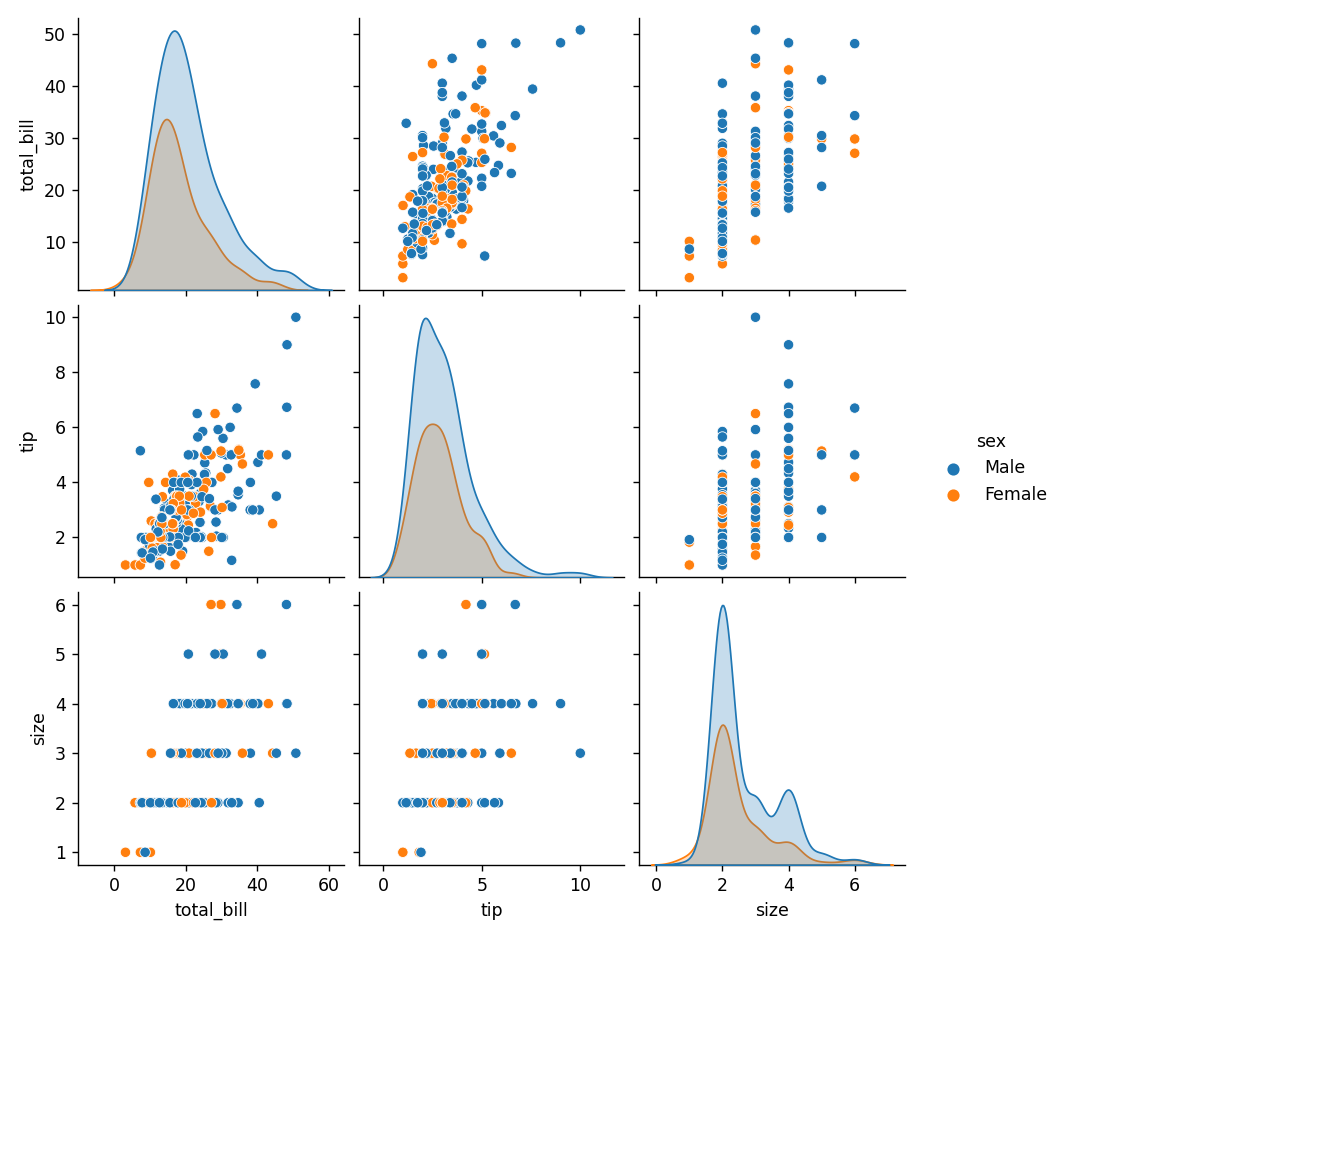

In [ ]:
# 관계 그래프 색상 추가
sns.pairplot(tips,hue="sex")

<IPython.core.display.Javascript object>


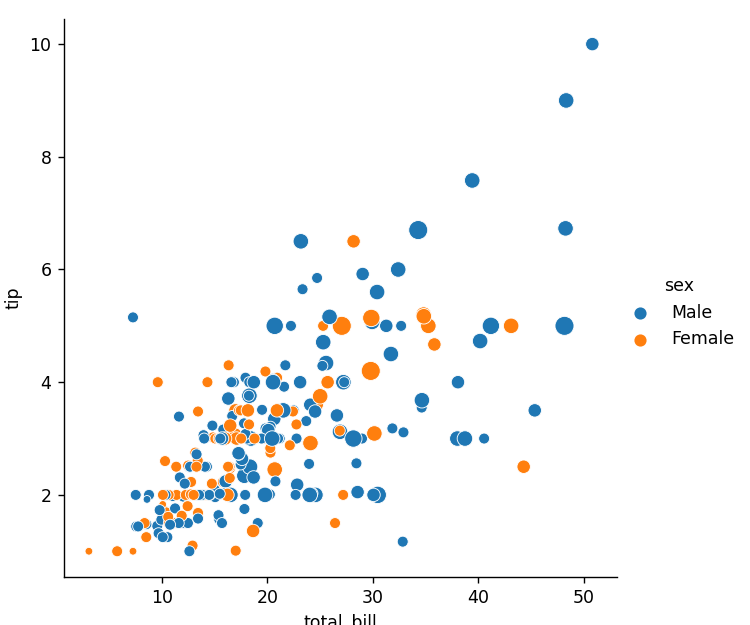

In [ ]:
# 산점도 그래프의 크기와 모양 조절하기 - scatter_kws={'s',데이터명["numeric변수명"]*10}
# scatter_kws에 딕셔너리 형태로 인잣값을 전달해야 한다

# 교재에 있는 코드는 아래와 같은데 작동하지 않는다
# scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', scatter_kws={'s':tips['size']*10})

# 검색한 결과 다음 plot을 사용하면 의도했던 대로 나온다
scatter = sns.relplot( x='total_bill', y='tip', data=tips, hue='sex', s=tips['size'] * 20)

<IPython.core.display.Javascript object>


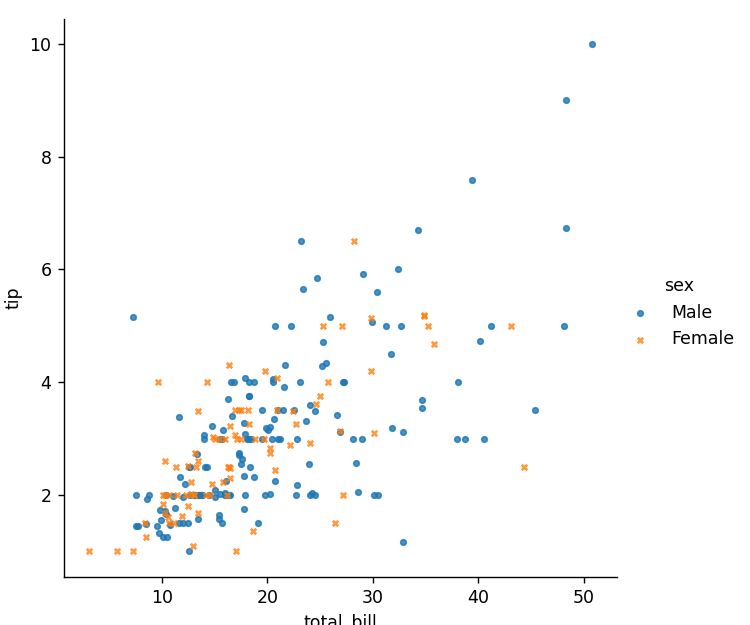

In [ ]:
scatter = sns.lmplot(x = 'total_bill', y = 'tip', data = tips, fit_reg = False, hue='sex', markers=['o', 'x'],scatter_kws={'s':10})
# lmplot 에서 사이즈 조정은 일괄적으로밖에 안되는 것 같다

<IPython.core.display.Javascript object>


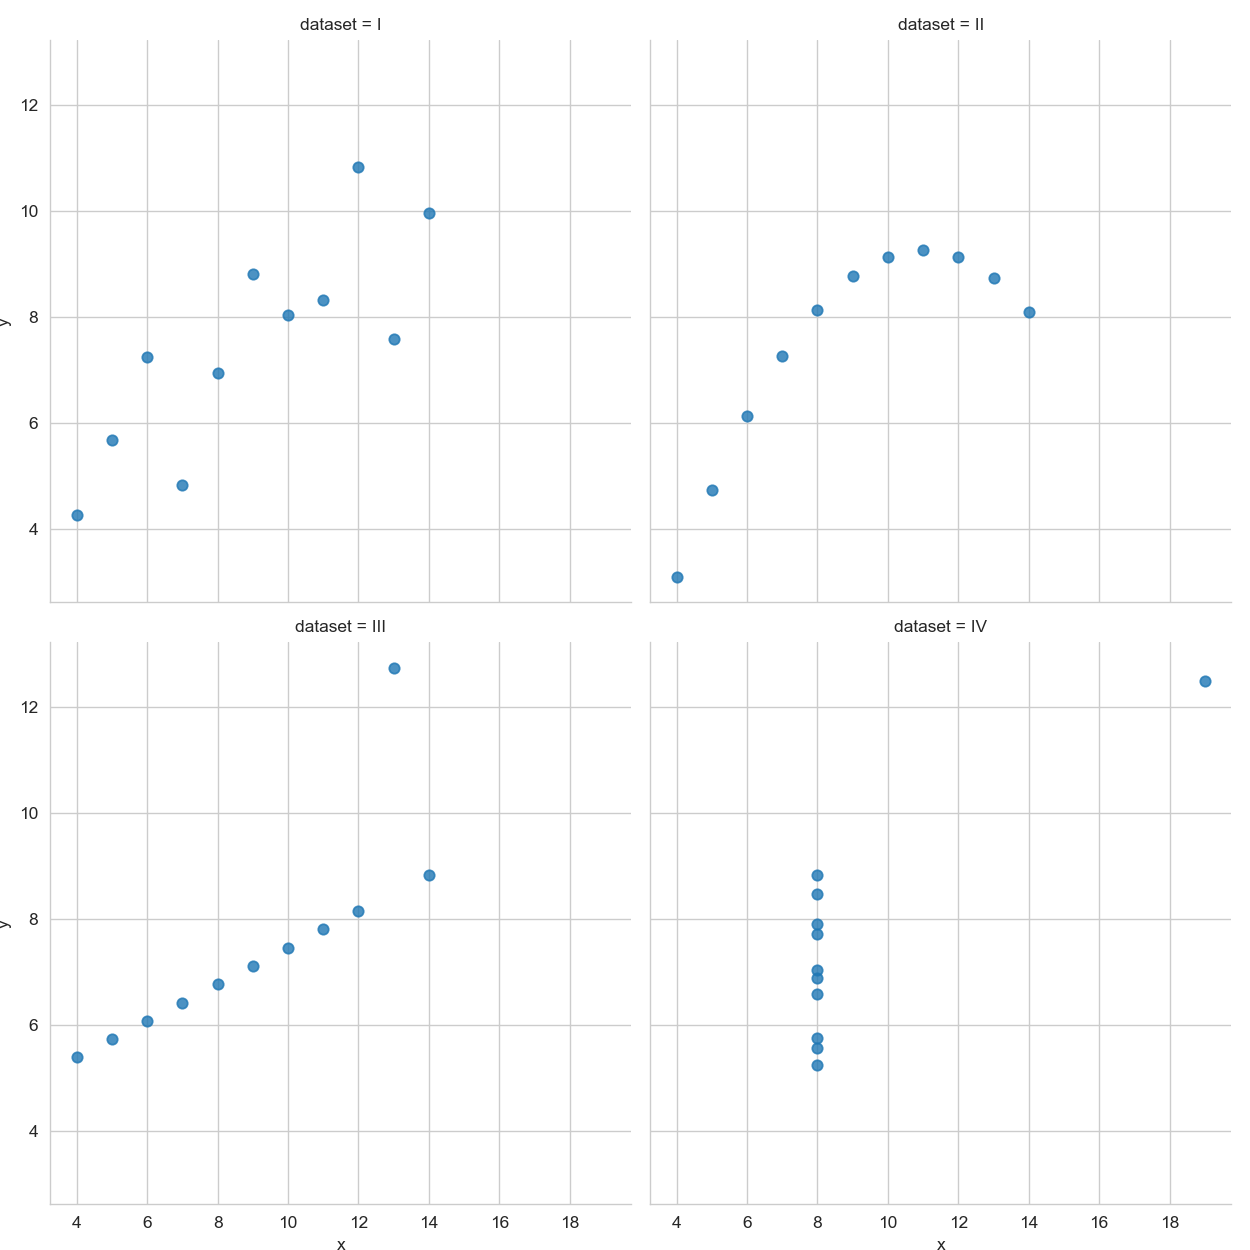

In [ ]:
# lmplot 메소드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기
# dataset 칼럼별로 그래프가 나누어 그려진다
# col_wrap 에 설정된 수의 그래프가 한 row에 그려진다
#그룹별로 그래프를 나누어 그리려면 lmplot 메서드에 추가로 col, col_wrap 인자를 설정해야 한다.
# "dataset" 칼럼별로 x,y에 대한 산점도를 그린 것이다.
anscombe_plot = sns.lmplot(x="x",y="y",data=anscombe,fit_reg=False,col="dataset",col_wrap=2)

### FacetGrid 클래스로 그룹별 그래프를 그릴 수 있다

<IPython.core.display.Javascript object>


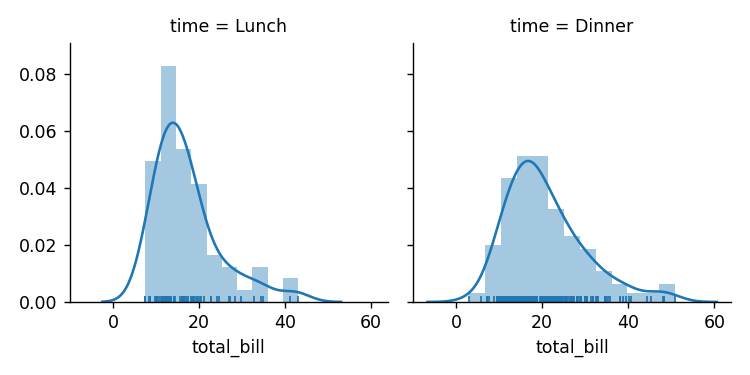

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

In [ ]:
#  FacetGrid()에 데이터프레임과 그룹을 구분할 열 이름을 전달하여 객체생성
# 그 후 객체의 map 메소드에 그래프의 종류와 x축으로 지정할 열 이름을 순서대로 전달한다.
facet = sns.FacetGrid(tips,col="time")
facet.map(sns.distplot,"total_bill", rug = True)

<IPython.core.display.Javascript object>


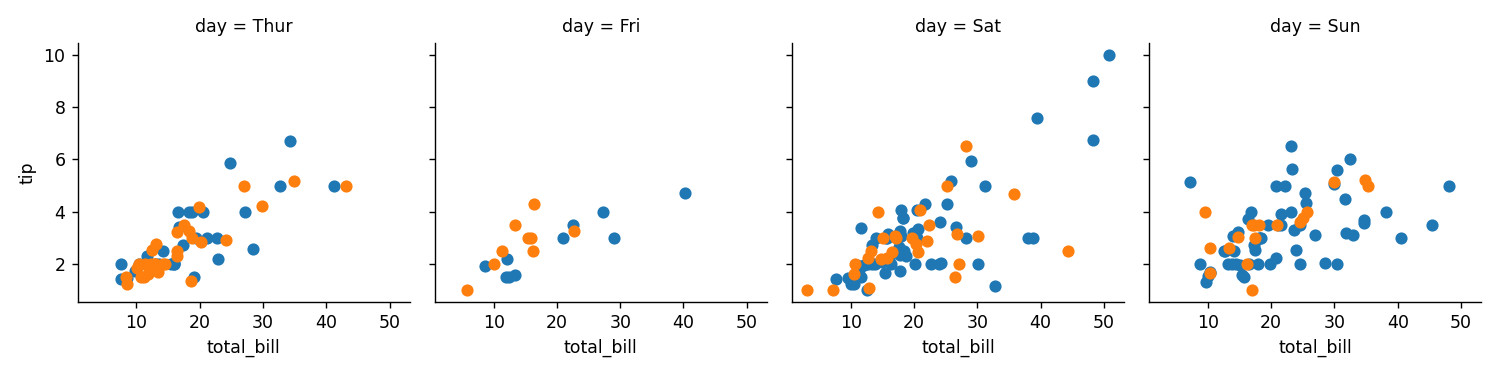

In [ ]:
# FacetGrid() 와 map()으로 다변량 그래프 그리기
facet = sns.FacetGrid(tips,col="day",hue="sex")
facet.map(plt.scatter,"total_bill","tip")

<IPython.core.display.Javascript object>


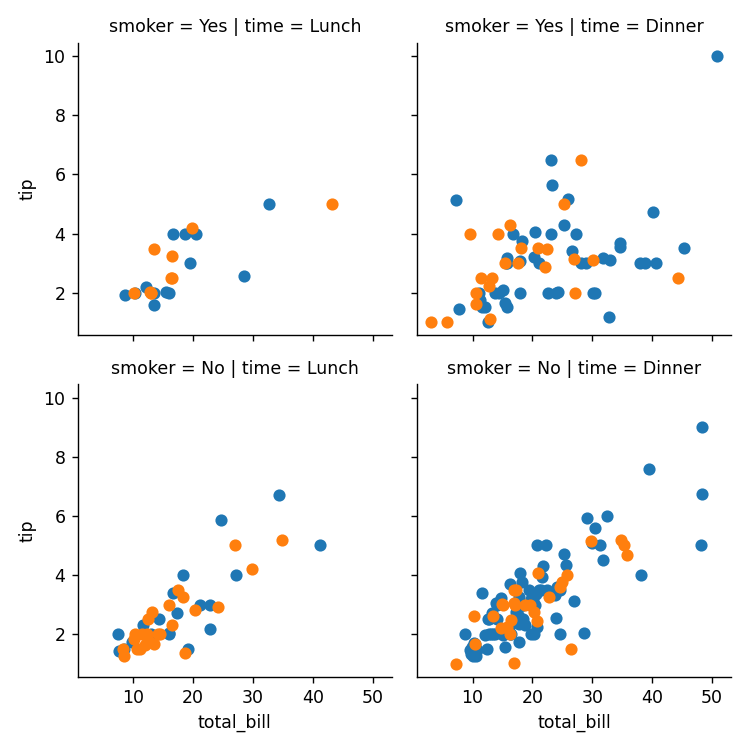

In [ ]:
facet = sns.FacetGrid(tips, col="time", row="smoker",hue="sex")
facet.map(plt.scatter,"total_bill","tip")

# 4-4. 데이터프레임과 시리즈로 그래프 그리기

### 데이터프레임과 시리즈로 그래프 그리기

<ipython-input-113-bbb679c73150>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax = plt.subplots()


<IPython.core.display.Javascript object>


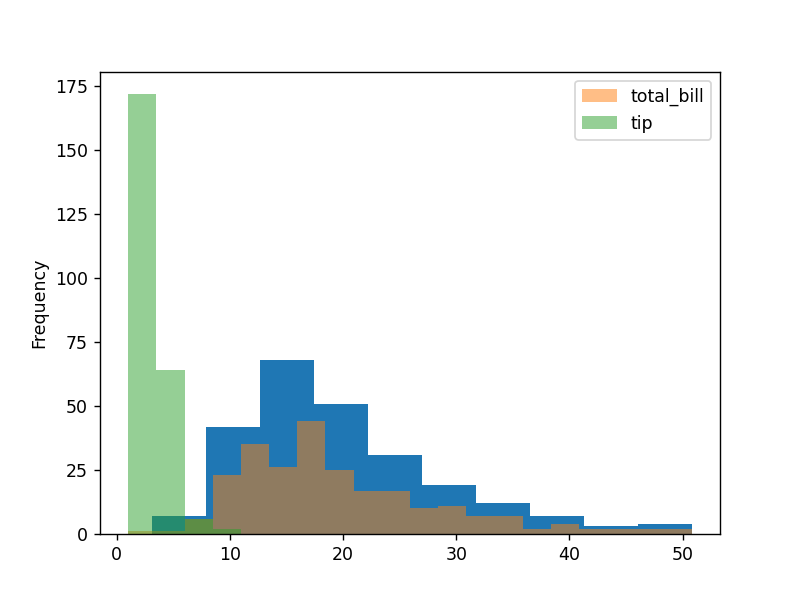

In [ ]:
ax = plt.subplots()
ax = tips["total_bill"].plot.hist()

<IPython.core.display.Javascript object>


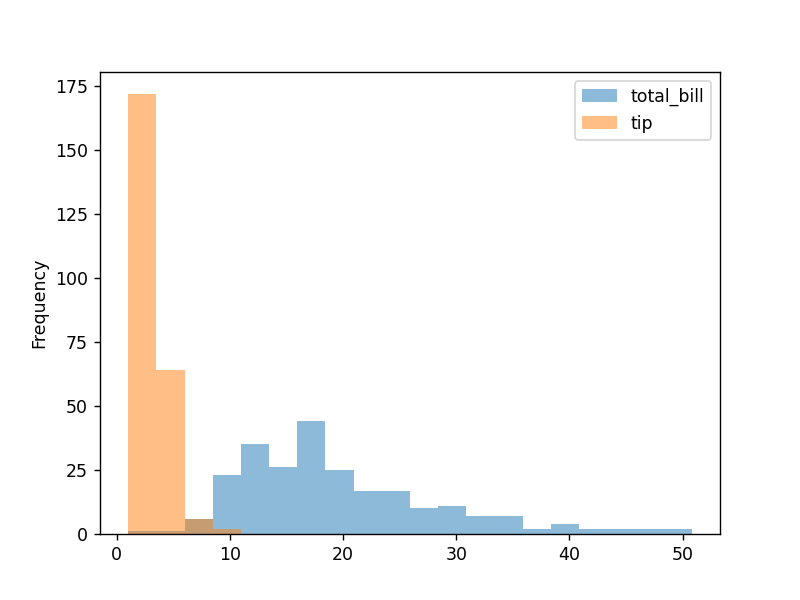

In [ ]:
fig,ax = plt.subplots()
ax= tips[["total_bill","tip"]].plot.hist(alpha=0.5,bins=20,ax=ax)

<IPython.core.display.Javascript object>


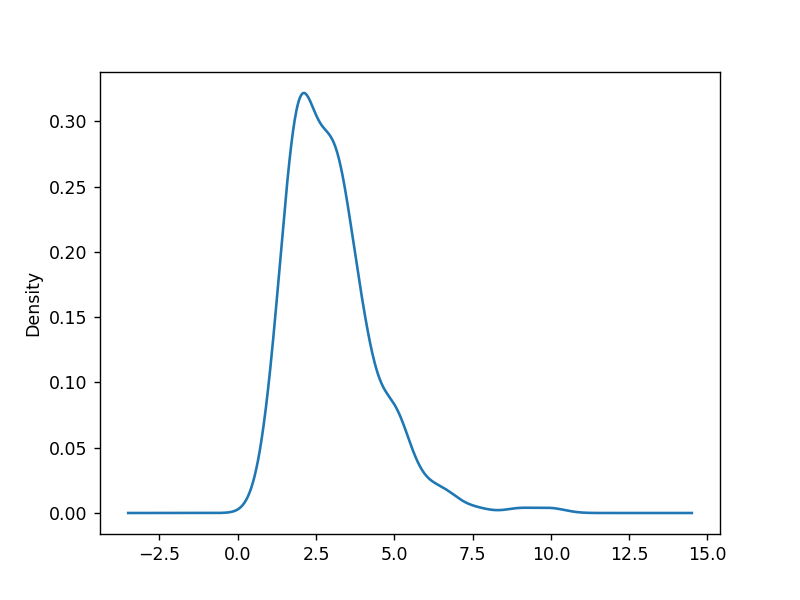

In [ ]:
ax = plt.subplots()
ax=tips["tip"].plot.kde()

<IPython.core.display.Javascript object>


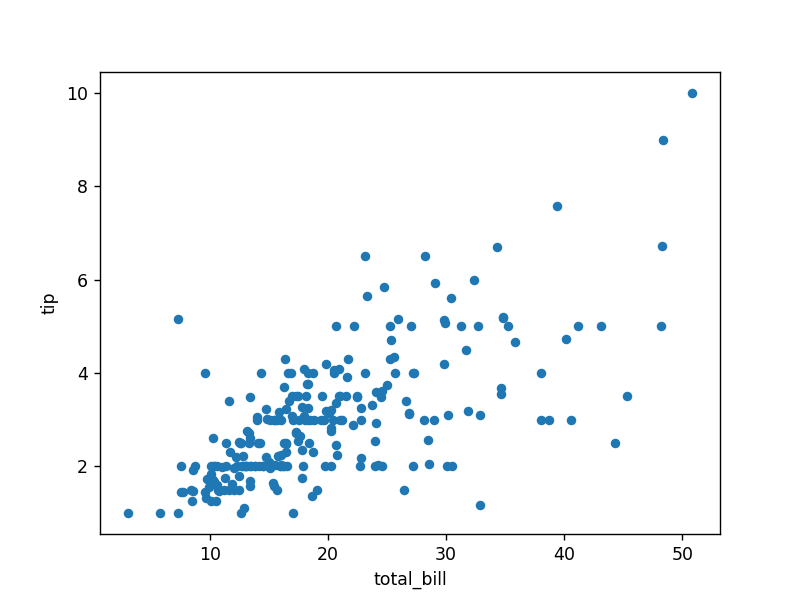

In [ ]:
fig,ax = plt.subplots()
ax = tips.plot.scatter(x="total_bill",y="tip",ax=ax)

<IPython.core.display.Javascript object>


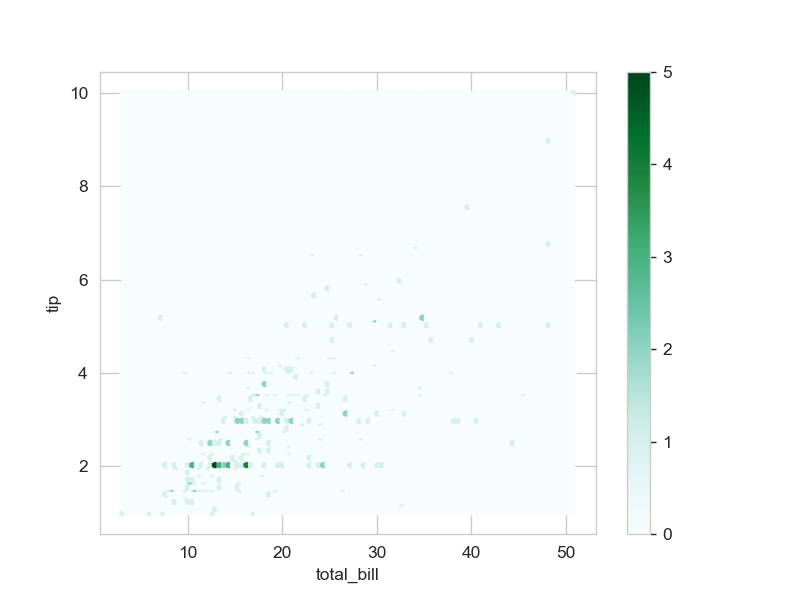

In [ ]:
fig,ax = plt.subplots()
ax = tips.plot.hexbin(x="total_bill",y="tip",ax=ax)

<IPython.core.display.Javascript object>


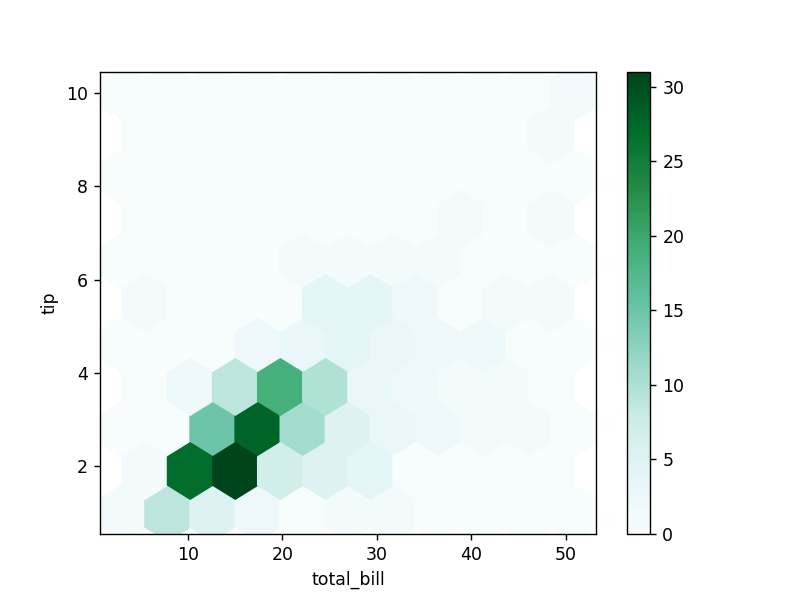

In [ ]:
fig,ax = plt.subplots()
ax = tips.plot.hexbin(x="total_bill",y="tip",gridsize=10, ax=ax)

# 4-5. seaborn 라이브러리로 그래프 스타일 설정하기
### 그래프에 스타일 적용하기

<IPython.core.display.Javascript object>


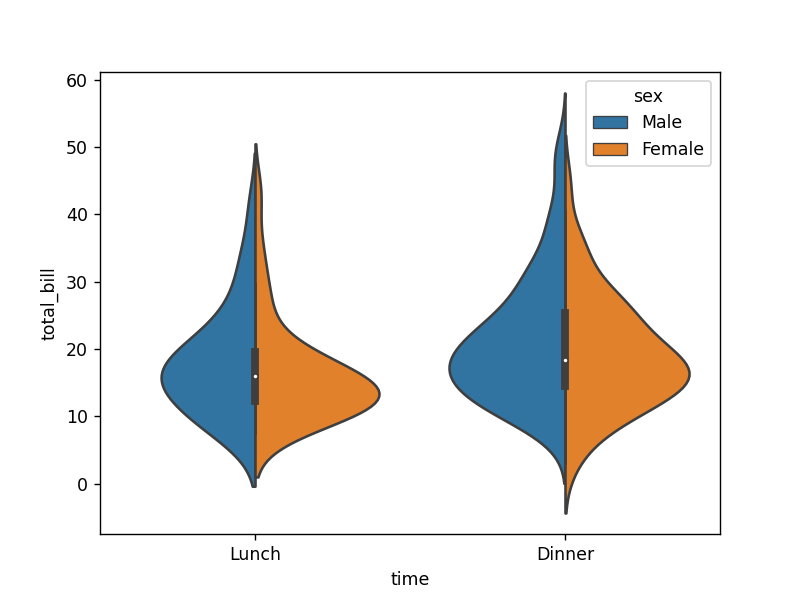

In [ ]:
fig,ax = plt.subplots()
ax = sns.violinplot(x="time",y="total_bill",data=tips,hue = "sex",split=True)

<IPython.core.display.Javascript object>


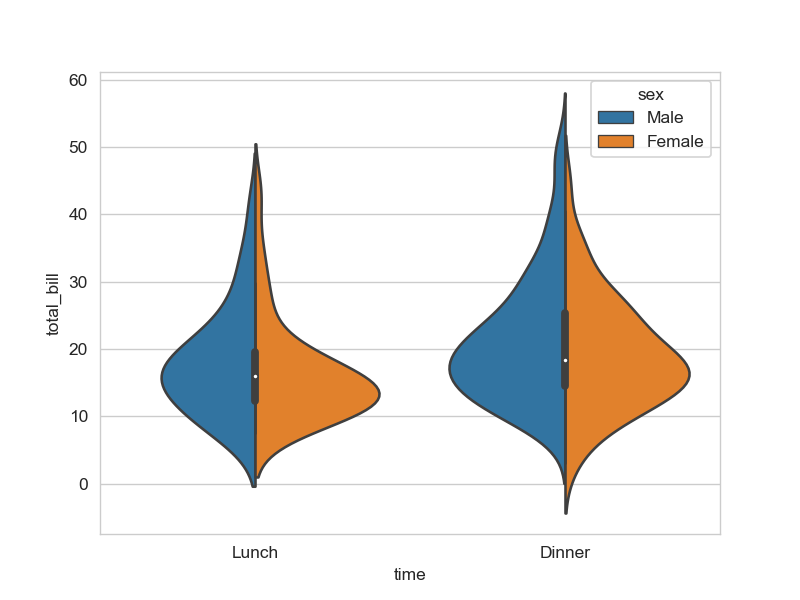

In [ ]:
sns.set_style("whitegrid")  # 배경에 가로줄이 생긴다
fig,ax = plt.subplots()
ax = sns.violinplot(x="time",y="total_bill",data=tips, hue = "sex",split=True)

<IPython.core.display.Javascript object>


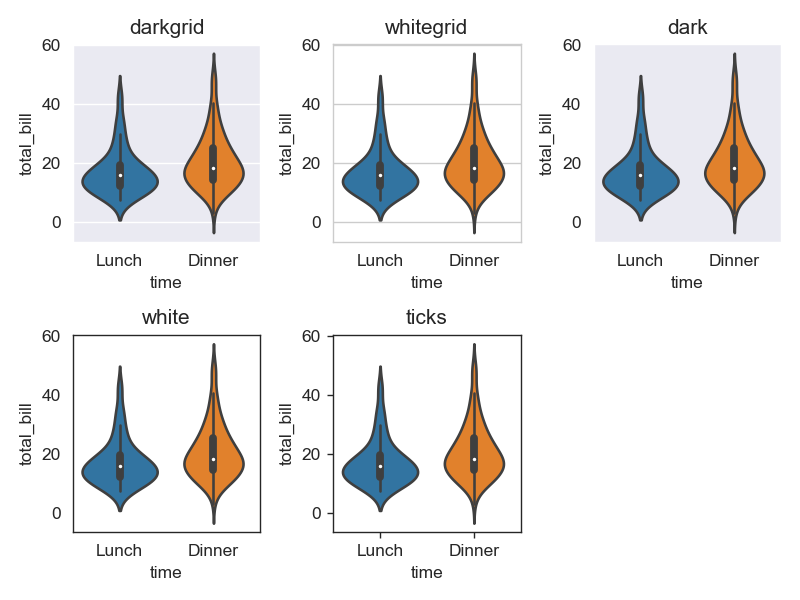

In [ ]:
fig = plt.figure()
seaborn_styles = ['darkgrid','whitegrid','dark','white','ticks']

for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style)
fig.tight_layout()